In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from shapely import wkt
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry import MultiPolygon
from shapely.geometry import MultiPolygon, GeometryCollection
from shapely.ops import cascaded_union
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize


In [2]:
datos = pd.read_csv("C:/Users/TANIA/Documents/Liam Data science/ResultadosElectorales_2023.csv")
datos

C:\Users\TANIA\AppData\Local\Temp\ipykernel_15260\3119209768.py:1: DtypeWarning: Columns (9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("C:/Users/TANIA/Documents/Liam Data science/ResultadosElectorales_2023.csv")


,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,96
1,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,65
2,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,44
3,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,13
4,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868097,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,EN BLANCO,2
5868098,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,NULO,1
5868099,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,IMPUGNADO,0
5868100,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,RECURRIDO,1


In [3]:
datos.head()

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,96
1,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,65
2,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,44
3,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,13
4,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,4


In [4]:
datos.tail()

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
5868097,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,EN BLANCO,2
5868098,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,NULO,1
5868099,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,IMPUGNADO,0
5868100,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,RECURRIDO,1
5868101,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,COMANDO,0


In [5]:
datos.shape

(5868102, 25)

In [6]:
datos.columns

Index(['año', 'eleccion_tipo', 'eleccion_id', 'recuento_tipo', 'recuento_id',
       'padron_tipo', 'distrito_id', 'distrito_nombre', 'seccionprovincial_id',
       'seccionprovincial_nombre', 'seccion_id', 'seccion_nombre',
       'circuito_id', 'circuito_nombre', 'mesa_id', 'mesa_tipo',
       'mesa_electores', 'cargo_id', 'cargo_nombre', 'agrupacion_id',
       'agrupacion_nombre', 'lista_numero', 'lista_nombre', 'votos_tipo',
       'votos_cantidad'],
      dtype='object')

In [7]:
datos.index

RangeIndex(start=0, stop=5868102, step=1)

In [8]:
datos.values

array([[2023, 'GENERAL', 2, ..., nan, 'POSITIVO', 96],
       [2023, 'GENERAL', 2, ..., nan, 'POSITIVO', 65],
       [2023, 'GENERAL', 2, ..., nan, 'POSITIVO', 44],
       ...,
       [2023, 'GENERAL', 2, ..., nan, 'IMPUGNADO', 0],
       [2023, 'GENERAL', 2, ..., nan, 'RECURRIDO', 1],
       [2023, 'GENERAL', 2, ..., nan, 'COMANDO', 0]], dtype=object)

In [9]:
datos.shape

(5868102, 25)

In [10]:
valores_votos_tipo = datos['votos_tipo'].unique()
print(valores_votos_tipo)

['POSITIVO' 'EN BLANCO' 'NULO' 'IMPUGNADO' 'RECURRIDO' 'COMANDO']


In [11]:
agrupaciones = datos ["agrupacion_nombre"].unique()
print(agrupaciones)

['UNION POR LA PATRIA' 'JUNTOS POR EL CAMBIO' 'LA LIBERTAD AVANZA'
 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD'
 'HACEMOS POR NUESTRO PAIS' nan 'RENOVADOR FEDERAL' 'CAMBIA JUJUY'
 'DEMOCRATA CRISTIANO'
 'FRENTE RENOVADOR DE LA CONCORDIA - INNOVACION FEDERAL'
 'PARTIDO AGRARIO Y SOCIAL' 'UNION POR SAN LUIS' 'UNION Y LIBERTAD'
 'POR SANTA CRUZ' 'CAMBIA SANTA CRUZ'
 'ENCUENTRO POR CORRIENTES - ECO+VAMOS CORRIENTES'
 'JUNTOS POR EL CAMBIO CHUBUT' 'MAS PARA ENTRE RIOS'
 'JUNTOS POR ENTRE RIOS' 'JUNTOS POR EL CAMBIO LA PAMPA' 'CAMBIA MENDOZA'
 'MOVIMIENTO LIBRES DEL SUR' 'ARRIBA NEUQUEN'
 'MOVIMIENTO POPULAR NEUQUINO' 'JUNTOS SOMOS RIO NEGRO' 'FE'
 'AHORA PATRIA' 'AUTONOMISTA' 'SI - SALTA INDEPENDIENTE'
 'LA FUERZA DE SANTA FE' 'FRENTE CIVICO POR SANTIAGO' 'FRENTE RENOVADOR'
 'FUERZA REPUBLICANA' 'REPUBLICANOS UNIDOS' 'SOMOS FUEGUINOS'
 'JUNTOS POR EL CAMBIO TDF' 'HACEMOS POR NUESTRO PAÍS'
 'CONSTRUIMOS FRAY MAMERTO ESQUIU' 'COMPROMISO CON VOS'
 'POR UNA CATAMARCA MEJOR' 'GEN' 'INTEGRAC

In [12]:
ClavesAgrupaciones = datos ["agrupacion_id"].unique()
print(ClavesAgrupaciones)


[   134    132    135    136    133      0  20132  20134  20135  20136
  90501  90503  90502 100079 100501 100502 100504 120187 120502 120503
 120005 140501 140502 140184 180501 180502 180503 190501 190503 190502
 190177 190504 200503 200504 200502 200501  10503  10504  10501  10502
  30502  30503  30501  40501  40506  40503  40502  40504  50503  50501
  50504  60503  60504  60501  70505  70504  70502  70506  80501  80502
  80503 110501 110502 110503 130503 130504 130502 130501 130040 150193
 150503 150504 150502 150151 160502 160503 160501 160077 160504 170231
 170502 170503 170501 170036 170229 210504 210501 210507 210506 210502
 220501 220502 220086 230502 230501 230181 230503 230040 240501 240212
 240167 240502 240503 240504  30430  30421  30309  30069  20642  20944
  20298  20951  20948  20921  20962  20903  20297  22103  20915  20942
  20935  20868  20965  20947  20933  20949  20895  20869  20040  20952
  20858  20956  20194  20697  20911  30504  30419  30507  30536  30465
  3054

In [13]:
agrupaciones_dict = datos[['agrupacion_id', 'agrupacion_nombre']].drop_duplicates().set_index('agrupacion_id')['agrupacion_nombre'].to_dict()
print(agrupaciones_dict)

{134: 'UNION POR LA PATRIA', 132: 'JUNTOS POR EL CAMBIO', 135: 'LA LIBERTAD AVANZA', 136: 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 133: 'HACEMOS POR NUESTRO PAIS', 0: nan, 20132: 'JUNTOS POR EL CAMBIO', 20134: 'UNION POR LA PATRIA', 20135: 'LA LIBERTAD AVANZA', 20136: 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 90501: 'UNION POR LA PATRIA', 90503: 'LA LIBERTAD AVANZA', 90502: 'JUNTOS POR EL CAMBIO', 100079: 'RENOVADOR FEDERAL', 100501: 'UNION POR LA PATRIA', 100502: 'CAMBIA JUJUY', 100504: 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD', 120187: 'LA LIBERTAD AVANZA', 120502: 'UNION POR LA PATRIA', 120503: 'JUNTOS POR EL CAMBIO', 120005: 'DEMOCRATA CRISTIANO', 140501: 'JUNTOS POR EL CAMBIO', 140502: 'FRENTE RENOVADOR DE LA CONCORDIA - INNOVACION FEDERAL', 140184: 'PARTIDO AGRARIO Y SOCIAL', 180501: 'JUNTOS POR EL CAMBIO', 180502: 'LA LIBERTAD AVANZA', 180503: 'UNION POR LA PATRIA', 190501: 'LA LIBERTAD AVANZA', 190503: 'UNION POR SAN LUIS', 190502: 'JUNTOS POR EL CAMBIO'

In [14]:
for clave, valor in agrupaciones_dict.items():
    print(f"Clave: {clave} -> Agrupación: {valor}")

Clave: 134 -> Agrupación: UNION POR LA PATRIA
Clave: 132 -> Agrupación: JUNTOS POR EL CAMBIO
Clave: 135 -> Agrupación: LA LIBERTAD AVANZA
Clave: 136 -> Agrupación: FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
Clave: 133 -> Agrupación: HACEMOS POR NUESTRO PAIS
Clave: 0 -> Agrupación: nan
Clave: 20132 -> Agrupación: JUNTOS POR EL CAMBIO
Clave: 20134 -> Agrupación: UNION POR LA PATRIA
Clave: 20135 -> Agrupación: LA LIBERTAD AVANZA
Clave: 20136 -> Agrupación: FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
Clave: 90501 -> Agrupación: UNION POR LA PATRIA
Clave: 90503 -> Agrupación: LA LIBERTAD AVANZA
Clave: 90502 -> Agrupación: JUNTOS POR EL CAMBIO
Clave: 100079 -> Agrupación: RENOVADOR FEDERAL
Clave: 100501 -> Agrupación: UNION POR LA PATRIA
Clave: 100502 -> Agrupación: CAMBIA JUJUY
Clave: 100504 -> Agrupación: FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
Clave: 120187 -> Agrupación: LA LIBERTAD AVANZA
Clave: 120502 -> Agrupación: UNION POR LA PATRIA
Clave: 120503 -> Agrupación: JUNTOS 

In [15]:
CirEl = datos["distrito_nombre"]. unique()
print(CirEl)

['Ciudad Autónoma de Buenos Aires' 'Buenos Aires' 'Catamarca' 'Córdoba'
 'Corrientes' 'Chaco' 'Chubut' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa'
 'La Rioja' 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan'
 'San Luis' 'Santa Cruz' 'Santa Fe' 'Santiago del Estero' 'Tucumán'
 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']


In [16]:
ClavesCirEl = datos["distrito_id"]. unique() 
print(ClavesCirEl)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [17]:
distritos_dict = datos[['distrito_id', 'distrito_nombre']].drop_duplicates().set_index('distrito_id')['distrito_nombre'].to_dict()
distritos_dict

{1: 'Ciudad Autónoma de Buenos Aires',
 2: 'Buenos Aires',
 3: 'Catamarca',
 4: 'Córdoba',
 5: 'Corrientes',
 6: 'Chaco',
 7: 'Chubut',
 8: 'Entre Ríos',
 9: 'Formosa',
 10: 'Jujuy',
 11: 'La Pampa',
 12: 'La Rioja',
 13: 'Mendoza',
 14: 'Misiones',
 15: 'Neuquén',
 16: 'Río Negro',
 17: 'Salta',
 18: 'San Juan',
 19: 'San Luis',
 20: 'Santa Cruz',
 21: 'Santa Fe',
 22: 'Santiago del Estero',
 23: 'Tucumán',
 24: 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'}

In [18]:
for clave, valor in distritos_dict.items():
    print(f"ID de Distrito: {clave} -> Nombre de Distrito: {valor}")
valores_distrito_id = datos['distrito_id'].unique()
print(valores_distrito_id)

ID de Distrito: 1 -> Nombre de Distrito: Ciudad Autónoma de Buenos Aires
ID de Distrito: 2 -> Nombre de Distrito: Buenos Aires
ID de Distrito: 3 -> Nombre de Distrito: Catamarca
ID de Distrito: 4 -> Nombre de Distrito: Córdoba
ID de Distrito: 5 -> Nombre de Distrito: Corrientes
ID de Distrito: 6 -> Nombre de Distrito: Chaco
ID de Distrito: 7 -> Nombre de Distrito: Chubut
ID de Distrito: 8 -> Nombre de Distrito: Entre Ríos
ID de Distrito: 9 -> Nombre de Distrito: Formosa
ID de Distrito: 10 -> Nombre de Distrito: Jujuy
ID de Distrito: 11 -> Nombre de Distrito: La Pampa
ID de Distrito: 12 -> Nombre de Distrito: La Rioja
ID de Distrito: 13 -> Nombre de Distrito: Mendoza
ID de Distrito: 14 -> Nombre de Distrito: Misiones
ID de Distrito: 15 -> Nombre de Distrito: Neuquén
ID de Distrito: 16 -> Nombre de Distrito: Río Negro
ID de Distrito: 17 -> Nombre de Distrito: Salta
ID de Distrito: 18 -> Nombre de Distrito: San Juan
ID de Distrito: 19 -> Nombre de Distrito: San Luis
ID de Distrito: 20 -> 

In [19]:
datos_caba = datos[datos['distrito_id'] == 1]
datos_caba.head()

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,96
1,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,65
2,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,44
3,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,13
4,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,4


In [20]:
datos_caba.tail(5)

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
5868097,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,EN BLANCO,2
5868098,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,NULO,1
5868099,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,IMPUGNADO,0
5868100,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,RECURRIDO,1
5868101,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,EXTRANJEROS,261,10,MIEMBROS DE JUNTA COMUNAL,0,NaN,NaN,NaN,COMANDO,0


In [21]:
datos_caba.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            5868092, 5868093, 5868094, 5868095, 5868096, 5868097, 5868098,
            5868099, 5868100, 5868101],
           dtype='int64', length=515822)

In [23]:
datos_caba.columns

Index(['año', 'eleccion_tipo', 'eleccion_id', 'recuento_tipo', 'recuento_id',
       'padron_tipo', 'distrito_id', 'distrito_nombre', 'seccionprovincial_id',
       'seccionprovincial_nombre', 'seccion_id', 'seccion_nombre',
       'circuito_id', 'circuito_nombre', 'mesa_id', 'mesa_tipo',
       'mesa_electores', 'cargo_id', 'cargo_nombre', 'agrupacion_id',
       'agrupacion_nombre', 'lista_numero', 'lista_nombre', 'votos_tipo',
       'votos_cantidad'],
      dtype='object')

In [24]:
type(datos_caba.columns)

pandas.core.indexes.base.Index

In [25]:
datos_caba.values

array([[2023, 'GENERAL', 2, ..., nan, 'POSITIVO', 96],
       [2023, 'GENERAL', 2, ..., nan, 'POSITIVO', 65],
       [2023, 'GENERAL', 2, ..., nan, 'POSITIVO', 44],
       ...,
       [2023, 'GENERAL', 2, ..., nan, 'IMPUGNADO', 0],
       [2023, 'GENERAL', 2, ..., nan, 'RECURRIDO', 1],
       [2023, 'GENERAL', 2, ..., nan, 'COMANDO', 0]], dtype=object)

In [26]:
datos_caba.shape

(515822, 25)

In [27]:
votos_cantidad_tipo = datos_caba['votos_cantidad']
print(votos_cantidad_tipo)

0          96
1          65
2          44
3          13
4           4
           ..
5868097     2
5868098     1
5868099     0
5868100     1
5868101     0
Name: votos_cantidad, Length: 515822, dtype: int64


In [28]:
cargos_tipo = datos_caba['cargo_nombre'].unique()
print(cargos_tipo)

['PRESIDENTE Y VICE' 'DIPUTADO NACIONAL' 'PARLAMENTO MERCOSUR NACIONAL'
 'PARLAMENTO MERCOSUR REGIONAL' 'JEFE/A DE GOBIERNO'
 'DIPUTADOS/AS DE LA CIUDAD AUTONOMA' 'MIEMBROS DE JUNTA COMUNAL']


In [29]:
seccion_nombre_tipo = datos_caba['seccion_nombre'].unique()
print(seccion_nombre_tipo)

['Comuna 01' 'Comuna 02' 'Comuna 03' 'Comuna 04' 'Comuna 05' 'Comuna 06'
 'Comuna 07' 'Comuna 08' 'Comuna 09' 'Comuna 10' 'Comuna 11' 'Comuna 12'
 'Comuna 13' 'Comuna 14' 'Comuna 15']


In [30]:
print(datos['votos_cantidad'].head())

0    96
1    65
2    44
3    13
4     4
Name: votos_cantidad, dtype: int64


In [31]:
print(datos['votos_cantidad'].unique())

[ 96  65  44  13   4   8   3   0 102  86  38   6   1  97  84  35   5 118
  77  41  12 129  61   9  10 101  83  33  20   2 106  74  55 109  36  15
   7  98 100  48  90  11  92  76  54  78  49  14  52  16 104  34  95  43
 105  46  94  88  39 110  82  42  99  56 113  69  45 112  51  85  30  93
  87  53 103 108  62  40 120  66  73  57  17 121  25  37  18  29 107  72
  47  63  75  81 111  58  79 136  59  70 132  50 135  71 133 125  64 151
  22 131  27 148  28 165  24 139  26 127 144  80  19 116  21  32  89 119
  68  67 115  60 160 159 184 157 169 182 170 161  23 137 198 190 152 167
 177 154 192 180 171 195 162 164 168 143 158  31 146 156 140 138 134 150
 128 122 117 114 123  91 145 147 141 149 130 155 166 163 186 183 178 174
 153 173 126 142 181 172 176 179 124 175 193 185 191 187 189 188 201 206
 211 202 197 196 207 194 210 199 200 229 213 225 204 205 208 203 227 209
 212 231 238 234 230 215 220 222 221 228 218 214 226 236 241 233 216 224
 219 232 223 217 235 257 243 237 248 254 259 250 23

In [32]:
datos_PYV = datos_caba[datos_caba['cargo_nombre'] == 'PRESIDENTE Y VICE']
datos_PYV.head()

,año,eleccion_tipo,eleccion_id,recuento_tipo,recuento_id,padron_tipo,distrito_id,distrito_nombre,seccionprovincial_id,seccionprovincial_nombre,...,mesa_tipo,mesa_electores,cargo_id,cargo_nombre,agrupacion_id,agrupacion_nombre,lista_numero,lista_nombre,votos_tipo,votos_cantidad
0,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,134,UNION POR LA PATRIA,NaN,NaN,POSITIVO,96
1,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,132,JUNTOS POR EL CAMBIO,NaN,NaN,POSITIVO,65
2,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,135,LA LIBERTAD AVANZA,NaN,NaN,POSITIVO,44
3,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,136,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,NaN,NaN,POSITIVO,13
4,2023,GENERAL,2,PROVISORIO,1,NORMAL,1,Ciudad Autónoma de Buenos Aires,NaN,NaN,...,NATIVOS,345,1,PRESIDENTE Y VICE,133,HACEMOS POR NUESTRO PAIS,NaN,NaN,POSITIVO,4


In [33]:
datos_PYV.columns

Index(['año', 'eleccion_tipo', 'eleccion_id', 'recuento_tipo', 'recuento_id',
       'padron_tipo', 'distrito_id', 'distrito_nombre', 'seccionprovincial_id',
       'seccionprovincial_nombre', 'seccion_id', 'seccion_nombre',
       'circuito_id', 'circuito_nombre', 'mesa_id', 'mesa_tipo',
       'mesa_electores', 'cargo_id', 'cargo_nombre', 'agrupacion_id',
       'agrupacion_nombre', 'lista_numero', 'lista_nombre', 'votos_tipo',
       'votos_cantidad'],
      dtype='object')

In [34]:
datos_PYV['votos_cantidad'].head()

0    96
1    65
2    44
3    13
4     4
Name: votos_cantidad, dtype: int64

In [35]:
total_electores = datos_PYV.groupby('mesa_id')['mesa_electores'].first().sum()
total_electores

2526676

In [36]:
cantidad_mesas = datos_PYV['mesa_id'].nunique() 
cantidad_mesas

7326

In [37]:
votos_nulos = datos_PYV[datos_PYV['votos_tipo'] == 'NULO']['votos_cantidad'].sum()
votos_impugnados = datos_PYV[datos_PYV['votos_tipo'] == 'IMPUGNADO']['votos_cantidad'].sum()
votos_recurridos = datos_PYV[datos_PYV['votos_tipo'] == 'RECURRIDO']['votos_cantidad'].sum()
votos_comando = datos_PYV[datos_PYV['votos_tipo'] == 'COMANDO']['votos_cantidad'].sum()
votos_positivos = datos_PYV[datos_PYV['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()
votos_en_blanco = datos_PYV[datos_PYV['votos_tipo'] == 'EN BLANCO']['votos_cantidad'].sum()
votos_validos = votos_positivos + votos_en_blanco
votos_recurridos_impugnados_comando = votos_recurridos + votos_impugnados + votos_comando

In [38]:
print(f"Cantidad de mesas: {cantidad_mesas}")
print(f"Total de electores en CABA: {total_electores}")
print(f"Votos nulos: {votos_nulos}")
print(f"Votos positivos: {votos_positivos}")
print(f"Votos en blanco: {votos_en_blanco}")
print(f"Votos válidos: {votos_validos}")
print(f"Votos recurridos, impugnados y comando: {votos_recurridos_impugnados_comando}")


Cantidad de mesas: 7326
Total de electores en CABA: 2526676
Votos nulos: 15367
Votos positivos: 1861375
Votos en blanco: 32311
Votos válidos: 1893686
Votos recurridos, impugnados y comando: 2378


In [39]:
def porcentaje_votos(votos_candidato, total_votos):
    porcentaje = (votos_candidato/total_votos) * 100
    return porcentaje
    
porcentaje_votos_positivos = porcentaje_votos(votos_positivos, total_electores)
porcentaje_votos_blanco = porcentaje_votos(votos_en_blanco, total_electores)
porcentaje_votos_nulos = porcentaje_votos(votos_nulos, total_electores)
porcentaje_votos_recurridos = porcentaje_votos(votos_recurridos, total_electores)
porcentaje_votos_comando = porcentaje_votos(votos_comando, total_electores)
porcentaje_votos_impugnados = porcentaje_votos(votos_impugnados, total_electores)

In [40]:
print(f"porcentaje de votos positivos: {porcentaje_votos_positivos:.2f}%")
print(f"porcentaje de votos en blanco: {porcentaje_votos_blanco:.2f}%")
print(f"porcentaje de votos nulos: {porcentaje_votos_nulos:.2f}%")
print(f"porcentaje de votos recurridos: {porcentaje_votos_recurridos:.2f}%")
print(f"porcentaje de votos comando: {porcentaje_votos_comando:.2f}%")
print(f"porcentaje de votos impugnados: {porcentaje_votos_impugnados:.2f}%")



porcentaje de votos positivos: 73.67%
porcentaje de votos en blanco: 1.28%
porcentaje de votos nulos: 0.61%
porcentaje de votos recurridos: 0.02%
porcentaje de votos comando: 0.07%
porcentaje de votos impugnados: 0.01%


In [41]:
votos_UxP_caba = datos_PYV[datos_PYV['agrupacion_nombre'] == 'UNION POR LA PATRIA']['votos_cantidad'].sum()
porcentaje_UxP_caba = (votos_UxP_caba / votos_positivos) * 100



In [42]:
votos_LAA_caba = datos_PYV[datos_PYV['agrupacion_nombre'] == 'LA LIBERTAD AVANZA']['votos_cantidad'].sum()
porcentaje_LLA_caba = (votos_LAA_caba / votos_positivos) * 100


In [43]:
votos_JxC_caba = datos_PYV[datos_PYV['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO']['votos_cantidad'].sum()
porcentaje_JxC_caba = (votos_JxC_caba / votos_positivos) * 100

In [44]:
print(f"Votos de Unión por la Patria en CABA (incluyendo votos nulos): {votos_UxP_caba}")
print(f"Porcentaje de votos de Unión por la Patria en CABA (incluyendo votos nulos): {porcentaje_UxP_caba:.2f}%")
print(f"Votos de LA LIBERTAD AVANZA en CABA (incluyendo votos nulos): {votos_LAA_caba}")
print(f"Porcentaje de votos de LA LIBERTAD AVANZA en CABA (incluyendo votos nulos): {porcentaje_LLA_caba:.2f}%")
print(f"Votos de JUNTOS POR EL CAMBIO en CABA (incluyendo votos nulos): {votos_JxC_caba}")
print(f"Porcentaje de votos de JUNTOS POR EL CAMBIO en CABA (incluyendo votos nulos): {porcentaje_JxC_caba:.2f}%")

Votos de Unión por la Patria en CABA (incluyendo votos nulos): 600832
Porcentaje de votos de Unión por la Patria en CABA (incluyendo votos nulos): 32.28%
Votos de LA LIBERTAD AVANZA en CABA (incluyendo votos nulos): 369424
Porcentaje de votos de LA LIBERTAD AVANZA en CABA (incluyendo votos nulos): 19.85%
Votos de JUNTOS POR EL CAMBIO en CABA (incluyendo votos nulos): 767367
Porcentaje de votos de JUNTOS POR EL CAMBIO en CABA (incluyendo votos nulos): 41.23%


In [67]:
Elecciones2023_CABA_UXP = datos_caba[
    (datos_caba['cargo_nombre'].isin(['PRESIDENTE Y VICE'])) &
    (datos_caba['agrupacion_nombre'] == 'UNION POR LA PATRIA')
]

In [68]:
votos_UXP = Elecciones2023_CABA_UXP[Elecciones2023_CABA_UXP['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()
print(votos_UXP)

600832


In [69]:
print(f"La cantidad total de votos de UNION POR LA PATRIA fue: {votos_UXP}")


La cantidad total de votos de UNION POR LA PATRIA fue: 600832


In [70]:
Elecciones2023_CABA_LLA = datos_caba[
    (datos_caba['cargo_nombre'].isin(['PRESIDENTE Y VICE'])) &
    (datos_caba['agrupacion_nombre'] == 'LA LIBERTAD AVANZA')
]
votos_LLA = Elecciones2023_CABA_LLA[Elecciones2023_CABA_LLA['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()


print(f"La cantidad total de votos de LA LIBERTAD AVANZA fue: {votos_LLA}")

La cantidad total de votos de LA LIBERTAD AVANZA fue: 369424


In [72]:
Elecciones2023_CABA_JXC = datos_caba[
    (datos_caba['cargo_nombre'].isin(['PRESIDENTE Y VICE'])) &
    (datos_caba['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO')
]
votos_JXC = Elecciones2023_CABA_JXC[Elecciones2023_CABA_JXC['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()

# Mostrar la cantidad total de votos de JUNTOS POR EL CAMBIO
print(f"La cantidad total de votos de JUNTOS POR EL CAMBIO fue: {votos_JXC}")

La cantidad total de votos de JUNTOS POR EL CAMBIO fue: 767367


In [73]:
Elecciones2023_CABA_FIT = datos_caba[
    (datos_caba['cargo_nombre'].isin(['PRESIDENTE Y VICE'])) &
    (datos_caba['agrupacion_nombre'] == 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD')
]
votos_FIT = Elecciones2023_CABA_FIT[Elecciones2023_CABA_FIT['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()

# Mostrar la cantidad total de votos de FIT
print(f"La cantidad total de votos de FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD fue: {votos_FIT}")

La cantidad total de votos de FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD fue: 66145


In [85]:
Elecciones2023_CABA_HNP = datos_caba[
    (datos_caba['cargo_nombre'].isin(['PRESIDENTE Y VICE'])) &
    (datos_caba['agrupacion_nombre'] == 'HACEMOS POR NUESTRO PAIS')
]
votos_HNP = Elecciones2023_CABA_HNP[Elecciones2023_CABA_HNP['votos_tipo'] == 'POSITIVO']['votos_cantidad'].sum()

# Mostrar la cantidad total de votos de HNP
print(f"La cantidad total de votos de HACEMOS POR NUESTRO PAIS fue: {votos_HNP}")

La cantidad total de votos de HACEMOS POR NUESTRO PAIS fue: 57607


In [82]:
total_UXP = Elecciones2023_CABA_UXP['votos_cantidad'].sum()
total_LLA = Elecciones2023_CABA_LLA['votos_cantidad'].sum()
total_JXC = Elecciones2023_CABA_JXC['votos_cantidad'].sum()

print(f"\nTotal de votos por agrupación:"
      f" UNION POR LA PATRIA = {total_UXP}, "
      f"LA LIBERTAD AVANZA = {total_LLA}, "
      f"JUNTOS POR EL CAMBIO = {total_JXC}")


Total de votos por agrupación: UNION POR LA PATRIA = 600832, LA LIBERTAD AVANZA = 369424, JUNTOS POR EL CAMBIO = 767367


In [90]:
votos_comunas = {}

# Selecciono comunas únicas en el DataFrame
comunasUxP = Elecciones2023_CABA_UXP['seccion_nombre'].unique()
comunasLLA = Elecciones2023_CABA_LLA['seccion_nombre'].unique()
comunasJXC = Elecciones2023_CABA_JXC['seccion_nombre'].unique()

# Calculo los votos por agrupación en cada comuna
for comuna in comunas:
    votos_UXP_comuna = Elecciones2023_CABA_UXP[Elecciones2023_CABA_UXP['seccion_nombre'] == comuna]['votos_cantidad'].sum()
    votos_LLA_comuna = Elecciones2023_CABA_LLA[Elecciones2023_CABA_LLA['seccion_nombre'] == comuna]['votos_cantidad'].sum()
    votos_JXC_comuna = Elecciones2023_CABA_JXC[Elecciones2023_CABA_JXC['seccion_nombre'] == comuna]['votos_cantidad'].sum()

    votos_comunas[comuna] = {
        'UNION POR LA PATRIA': votos_UXP_comuna,
        'LA LIBERTAD AVANZA': votos_LLA_comuna,
        'JUNTOS POR EL CAMBIO': votos_JXC_comuna
    }
    print(f"{comuna}: "
          f"UNION POR LA PATRIA = {votos_UXP_comuna}, "
          f"LA LIBERTAD AVANZA = {votos_LLA_comuna}, "
          f"JUNTOS POR EL CAMBIO = {votos_JXC_comuna}")

# Calcular y mostrar el total de votos por agrupación
total_UXP = Elecciones2023_CABA_UXP['votos_cantidad'].sum()
total_LLA = Elecciones2023_CABA_LLA['votos_cantidad'].sum()
total_JXC = Elecciones2023_CABA_JXC['votos_cantidad'].sum()

print(f"\nTotal de votos por agrupación:"
      f" UNION POR LA PATRIA = {total_UXP}, "
      f"LA LIBERTAD AVANZA = {total_LLA}, "
      f"JUNTOS POR EL CAMBIO = {total_JXC}")

Comuna 01: UNION POR LA PATRIA = 38645, LA LIBERTAD AVANZA = 25657, JUNTOS POR EL CAMBIO = 45975
Comuna 02: UNION POR LA PATRIA = 19225, LA LIBERTAD AVANZA = 17875, JUNTOS POR EL CAMBIO = 57022
Comuna 03: UNION POR LA PATRIA = 38993, LA LIBERTAD AVANZA = 23562, JUNTOS POR EL CAMBIO = 39075
Comuna 04: UNION POR LA PATRIA = 51401, LA LIBERTAD AVANZA = 29077, JUNTOS POR EL CAMBIO = 39963
Comuna 05: UNION POR LA PATRIA = 42504, LA LIBERTAD AVANZA = 20595, JUNTOS POR EL CAMBIO = 43259
Comuna 06: UNION POR LA PATRIA = 39230, LA LIBERTAD AVANZA = 20043, JUNTOS POR EL CAMBIO = 54873
Comuna 07: UNION POR LA PATRIA = 44622, LA LIBERTAD AVANZA = 28137, JUNTOS POR EL CAMBIO = 48420
Comuna 08: UNION POR LA PATRIA = 43136, LA LIBERTAD AVANZA = 27845, JUNTOS POR EL CAMBIO = 26068
Comuna 09: UNION POR LA PATRIA = 39233, LA LIBERTAD AVANZA = 25544, JUNTOS POR EL CAMBIO = 37413
Comuna 10: UNION POR LA PATRIA = 37457, LA LIBERTAD AVANZA = 23062, JUNTOS POR EL CAMBIO = 41986
Comuna 11: UNION POR LA PATRIA

In [83]:
porcentaje_comunas = {}
porcentaje_comunas
# Selecciono comunas únicas en el DataFrame
comunas = Elecciones2023_CABA_UXP['seccion_nombre'].unique()


In [88]:
for comuna in comunas:
    votos_UXP_comuna = Elecciones2023_CABA_UXP[Elecciones2023_CABA_UXP['seccion_nombre'] == comuna]['votos_cantidad'].sum()
    votos_LLA_comuna = Elecciones2023_CABA_LLA[Elecciones2023_CABA_LLA['seccion_nombre'] == comuna]['votos_cantidad'].sum()
    votos_JXC_comuna = Elecciones2023_CABA_JXC[Elecciones2023_CABA_JXC['seccion_nombre'] == comuna]['votos_cantidad'].sum()
    votos_FIT_comuna = Elecciones2023_CABA_FIT[Elecciones2023_CABA_FIT['seccion_nombre'] == comuna]['votos_cantidad'].sum()
    votos_HNP_comuna = Elecciones2023_CABA_HNP[Elecciones2023_CABA_HNP['seccion_nombre'] == comuna]['votos_cantidad'].sum()

    total_votos_comuna = votos_UXP_comuna + votos_LLA_comuna + votos_JXC_comuna + votos_HNP_comuna + votos_FIT_comuna

    porcentaje_UXP_comuna = (votos_UXP_comuna / total_votos_comuna) * 100
    porcentaje_LLA_comuna = (votos_LLA_comuna / total_votos_comuna) * 100
    porcentaje_JXC_comuna = (votos_JXC_comuna / total_votos_comuna) * 100
    porcentaje_FIT_comuna = (votos_FIT_comuna / total_votos_comuna) * 100
    porcentaje_HNP_comuna = (votos_HNP_comuna / total_votos_comuna) * 100

    porcentaje_comunas[comuna] = {
        'UNION POR LA PATRIA': porcentaje_UXP_comuna,
        'LA LIBERTAD AVANZA': porcentaje_LLA_comuna,
        'JUNTOS POR EL CAMBIO': porcentaje_JXC_comuna,
        'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': porcentaje_FIT_comuna,
        'HACEMOS POR NUESTRO PAIS': porcentaje_HNP_comuna
    }

    print(f"{comuna}: "
          f"UNION POR LA PATRIA = {porcentaje_UXP_comuna:.2f}%, "
          f"LA LIBERTAD AVANZA = {porcentaje_LLA_comuna:.2f}%, "
          f"JUNTOS POR EL CAMBIO = {porcentaje_JXC_comuna:.2f}%, "
          f"FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD = {porcentaje_FIT_comuna:.2f}%, "
          f"HACEMOS POR NUESTRO PAIS = {porcentaje_HNP_comuna:.2f}%")

Comuna 01: UNION POR LA PATRIA = 32.89%, LA LIBERTAD AVANZA = 21.84%, JUNTOS POR EL CAMBIO = 39.13%, FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD = 3.39%, HACEMOS POR NUESTRO PAIS = 2.75%
Comuna 02: UNION POR LA PATRIA = 19.56%, LA LIBERTAD AVANZA = 18.19%, JUNTOS POR EL CAMBIO = 58.02%, FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD = 1.95%, HACEMOS POR NUESTRO PAIS = 2.29%
Comuna 03: UNION POR LA PATRIA = 35.59%, LA LIBERTAD AVANZA = 21.51%, JUNTOS POR EL CAMBIO = 35.66%, FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD = 4.17%, HACEMOS POR NUESTRO PAIS = 3.07%
Comuna 04: UNION POR LA PATRIA = 39.47%, LA LIBERTAD AVANZA = 22.33%, JUNTOS POR EL CAMBIO = 30.68%, FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD = 4.29%, HACEMOS POR NUESTRO PAIS = 3.23%
Comuna 05: UNION POR LA PATRIA = 37.01%, LA LIBERTAD AVANZA = 17.93%, JUNTOS POR EL CAMBIO = 37.67%, FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD = 4.19%, HACEMOS POR NUESTRO PAIS = 3.20%
Comuna 06: UNION POR LA PATRIA = 32.14%, LA LIBERT

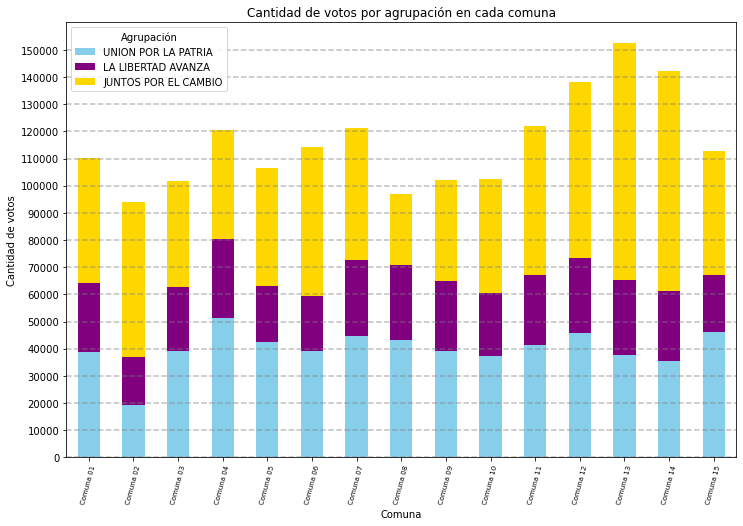

In [92]:
df_resultados = pd.DataFrame(votos_comunas).T
colores = {'UNION POR LA PATRIA': 'skyblue', 'JUNTOS POR EL CAMBIO': 'gold', 'LA LIBERTAD AVANZA': 'purple'}

# Graficar los resultados por comuna con colores personalizados
ax = df_resultados.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colores[col] for col in df_resultados.columns])
plt.title('Cantidad de votos por agrupación en cada comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de votos')
plt.legend(title='Agrupación')

# Rotar las etiquetas del eje x
plt.xticks(rotation=75)

# Reducir el tamaño de la letra del eje x en un 30%
plt.tick_params(axis='x', labelsize=plt.rcParams['font.size'] * 0.7)

# Configurar el eje y con marcas cada 10,000 votos y límite hasta 150,000
plt.yticks(range(0, 150001, 10000))

# Agregar líneas punteadas en el eje x
for y in range(0, 150001, 10000):
    plt.axhline(y, linestyle='--', color='grey', alpha=0.5)

plt.show()

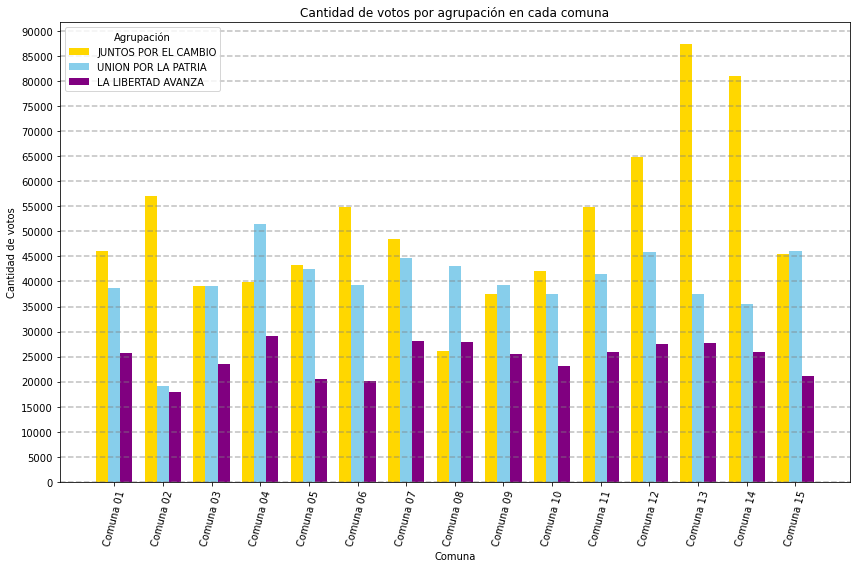

In [94]:
df_resultados = pd.DataFrame(votos_comunas).T

# Definir los colores para cada agrupación
colores = {'JUNTOS POR EL CAMBIO': 'gold', 'UNION POR LA PATRIA': 'skyblue',  'LA LIBERTAD AVANZA': 'purple'}

# Graficar los resultados por comuna con colores personalizados
fig, ax = plt.subplots(figsize=(12, 8))

# Obtener los nombres de las comunas y el número de barras
comunas = df_resultados.index.tolist()
num_comunas = len(comunas)
bar_width = 0.25  # Ancho de cada barra

# Coordenadas para ubicar las barras
x = np.arange(num_comunas)

# Dibujar las barras para cada agrupación
for i, (agrupacion, color) in enumerate(colores.items()):
    ax.bar(x + i * bar_width, df_resultados[agrupacion], width=bar_width, color=color, label=agrupacion)

# Configurar etiquetas, leyendas y otros detalles del gráfico
ax.set_xlabel('Comuna')
ax.set_ylabel('Cantidad de votos')
ax.set_title('Cantidad de votos por agrupación en cada comuna')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(comunas)
ax.legend(title='Agrupación')
plt.xticks(rotation=75)

# Configurar el eje y con marcas cada 5000 votos y límites hasta 150000
plt.yticks(np.arange(0, 95000, 5000))
for y in range(0, 95000, 5000):
    plt.axhline(y, linestyle='--', color='grey', alpha=0.5)

plt.tight_layout()
plt.show()


In [100]:
CircuitosElectorales = gpd.read_file('C:/Users/TANIA/Documents/Liam Data science/circuitos-electorales.csv')
CircuitosElectorales

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,001,1,1,SAN TELMO,11377.00000000000,5695.00000000000,5682.00000000000,4157.17556283000,709721.55022900004,"MULTIPOLYGON (((-58.36619 -34.62043, -58.36606..."
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,002,2,1,SAN TELMO,11365.00000000000,5870.00000000000,5495.00000000000,3045.85873489000,523430.86001399998,"MULTIPOLYGON (((-58.37736 -34.61745, -58.37743..."
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,003,3,1,PUERTO MADERO,702.00000000000,416.00000000000,286.00000000000,14439.58562320000,4248032.90197000000,"MULTIPOLYGON (((-58.35729 -34.59511, -58.35723..."
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,004,4,1,PUERTO MADERO,489.00000000000,307.00000000000,182.00000000000,8028.11547007000,777372.45509700000,"MULTIPOLYGON (((-58.36712 -34.61214, -58.36762..."
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,005,5,1,RETIRO,5275.00000000000,3131.00000000000,2144.00000000000,16401.98147680000,3262096.05041000010,"MULTIPOLYGON (((-58.38356 -34.57824, -58.38328..."
...,...,...,...,...,...,...,...,...,...,...,...
162,MULTIPOLYGON (((-58.4133289404238 -34.64349004...,057,57,4,NUEVA POMPEYA,18768.00000000000,9532.00000000000,9236.00000000000,6341.98611558000,1681075.20221000000,"MULTIPOLYGON (((-58.41333 -34.64349, -58.41254..."
163,MULTIPOLYGON (((-58.4752520574717 -34.66896222...,089,89,8,VILLA LUGANO,46140.00000000000,23699.00000000000,22441.00000000000,10058.06223910000,4524565.79088000020,"MULTIPOLYGON (((-58.47525 -34.66896, -58.47441..."
164,MULTIPOLYGON (((-58.464421436223 -34.660057142...,090,90,8,VILLA LUGANO,42538.00000000000,21474.00000000000,21064.00000000000,10870.01898480000,4771793.77496999970,"MULTIPOLYGON (((-58.46442 -34.66006, -58.46448..."
165,MULTIPOLYGON (((-58.4713146924268 -34.63664464...,112,112,10,FLORESTA,8290.00000000000,3945.00000000000,4345.00000000000,3067.80447799000,542171.08825499995,"MULTIPOLYGON (((-58.47131 -34.63664, -58.47131..."


C:\Users\TANIA\AppData\Local\Temp\ipykernel_15260\2098667524.py:6: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  return cascaded_union(geometrias)


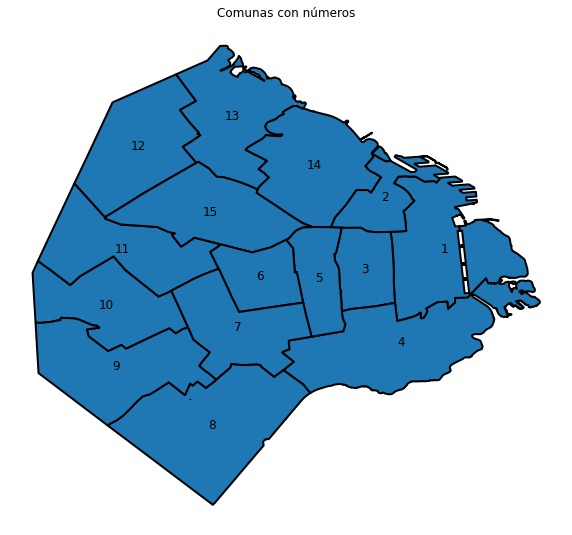

In [101]:
CircuitosElectorales.columns
CircuitosElectorales.head(10)

def unir_geometrias(grupo):
    geometrias = [geom for geom in grupo.geometry]
    return cascaded_union(geometrias)
CircuitosElectorales.columns
# Agrupar por 'departamen' y unir las geometrías de cada grupo (comuna)
comunas_agrupadas = CircuitosElectorales.groupby('COMUNA').apply(unir_geometrias)
# Crear un nuevo GeoDataFrame con las comunas agrupadas
nuevo_geodf = gpd.GeoDataFrame(geometry=comunas_agrupadas, crs=CircuitosElectorales.crs)


# ####### MAPA POR COMUNAS #######
# Plot de las comunas
ax = nuevo_geodf.plot(figsize=(10, 10), edgecolor='black', linewidth=2)

# Agregar etiquetas con el nombre de las comunas en el centro
for idx, row in nuevo_geodf.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(idx, (centroid.x, centroid.y), color='black', fontsize=12, ha='center', va='center')

plt.title('Comunas con números')
plt.axis('off')
plt.show()